In [58]:
#!/usr/bin/env python

import librosa 
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np 
np.set_printoptions(precision=2,suppress=True)
from numpy import newaxis

import scipy
from librosa import display
import os
import subprocess
import glob
import tensorflow as tf
#tf.python.control_flow_ops = tf


import time
import datetime

from keras.layers.core import Dense, Activation, Dropout 
from keras.layers.recurrent import LSTM 
from keras.models import Sequential
from keras.models import load_model 
from keras.layers import Dense, LSTM, TimeDistributed
from keras.utils import np_utils
from keras.callbacks import ModelCheckpoint
import cwrnn # clockwork rnn 
from matplotlib.ticker import FormatStrFormatter

# set default matplotlib font 
from matplotlib import rcParams
rcParams['font.family'] = 'Times New Roman'

import warnings
warnings.filterwarnings('ignore')
# config file
import config.nn_config as nn_config
from models import model_builds


nn_params = nn_config.get_nn_params()


'onsetsdir' : 'np-data/onsets/steve-gadd/'
'MIDI sequence directory' : 'plots/MIDI/steve-gadd/'
'sequence length' : 100
'sourcedir' : 'audio/steve-gadd/'
'midi dir' : 'midi/steve-gadd/'
'models dir' : 'models/steve-gadd/'
'batchsize' : 10
'ADT sequence directory' : 'plots/ADT/steve-gadd/'
'weightsdir' : 'model-weights/steve-gadd/'
'dev data dir' : 'np-data/dev-data/steve-gadd/'
'model type' : 'lstm'
'epochs' : 3
'rendered midi dir' : 'midi/rendered-steve-gadd/'
'drummer' : 'steve-gadd'
'training data dir' : 'np-data/training-data/steve-gadd/'
'slicedir' : 'audio/sliced/steve-gadd/'
'loss directory' : 'plots/loss/steve-gadd/'
'activationsdir' : 'np-data/activations/steve-gadd/'


In [2]:
# thetrdataX= nn_params["training data dir"] + nn_params["drummer"] + "" + str(nn_params["sequence length"]) + "_X.npy"
# thetrdataY = nn_params["training data dir"] + nn_params["drummer"] + "_seq2seq" + str(nn_params["sequence length"]) + "_Y.npy"

xtr = np.load('np-data/training-data/metallica/metallica_seq100_X.npy')
ytr = np.load('np-data/training-data/metallica/metallica_seq100_Y.npy')
print xtr.shape, ytr.shape
# xtr = np.load(thetrdataX)
# ytr = np.load(thetrdataY)

print xtr.shape, ytr.shape



# model = model_builds.build_time_distributed_stateful_model(nn_params['batchsize'], xtr.shape[1], xtr.shape[2], ytr.shape[1])

(168842, 99, 10) (168842, 10)
(168842, 99, 10) (168842, 10)


In [63]:
#xtr = np.load(nn_params["training data dir"] + nn_params["drummer"] + "_X.npy") 
#ytr = np.load(nn_params["training data dir"] + nn_params["drummer"] + "_Y.npy") 
# call back function to save weights after every epoch (or iteration through batch here)
filepath="./model-weights/weights-improvement-{epoch:02d}-{loss:.2f}.hdf5"
filepath = nn_params["weightsdir"] + "weights-improvement-{epoch:02d}-{loss:.2f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='loss', verbose=1, save_best_only=True, mode='min')
callbacks_list = [checkpoint]

print "x tr shape:", xtr.shape
print "y tr shape:", ytr.shape

from models import model_builds

batch_size = 99
model = model_builds.build_model(
    xtr.shape[1], 
    xtr.shape[2], 
    ytr.shape[1]
)




# model = model_builds.build_model(
#     input_dim_1 = xtr.shape[1],
#     input_dim_2 = xtr.shape[2],
#     y_input_dim_1 = ytr.shape[1]
#     )





x tr shape: (168842, 99, 10)
y tr shape: (168842, 10)


(168842, 92, 10) (168842, 7, 10)


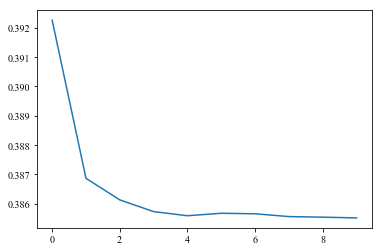

In [140]:
plt.figure()
plt.plot(history.history['loss'])
plt.show()

In [64]:
epochs = 100


history = model.fit(xtr, ytr, epochs=epochs, batch_size=batch_size, verbose=1, validation_split=0.9)


Train on 16884 samples, validate on 151958 samples
Epoch 1/100
16884/16884 [==============================] - 32s 2ms/step - loss: 1.1634 - acc: 0.2161 - val_loss: 0.8772 - val_acc: 0.2576
Epoch 2/100
16884/16884 [==============================] - 33s 2ms/step - loss: 0.7497 - acc: 0.3571 - val_loss: 0.6308 - val_acc: 0.3877
Epoch 3/100
16884/16884 [==============================] - 32s 2ms/step - loss: 0.5749 - acc: 0.3916 - val_loss: 0.5502 - val_acc: 0.3064
Epoch 4/100
16884/16884 [==============================] - 32s 2ms/step - loss: 0.5127 - acc: 0.3905 - val_loss: 0.5224 - val_acc: 0.3366
Epoch 5/100
16884/16884 [==============================] - 32s 2ms/step - loss: 0.4871 - acc: 0.3892 - val_loss: 0.5153 - val_acc: 0.3065
Epoch 6/100
16884/16884 [==============================] - 32s 2ms/step - loss: 0.4739 - acc: 0.3866 - val_loss: 0.5068 - val_acc: 0.3559
Epoch 7/100
16884/16884 [==============================] - 32s 2ms/step - loss: 0.4648 - acc: 0.3894 - val_loss: 0.4980 -

16884/16884 [==============================] - 31s 2ms/step - loss: 0.4248 - acc: 0.3845 - val_loss: 0.5473 - val_acc: 0.4049
Epoch 60/100
16884/16884 [==============================] - 31s 2ms/step - loss: 0.4246 - acc: 0.3880 - val_loss: 0.5497 - val_acc: 0.2960
Epoch 61/100
16884/16884 [==============================] - 31s 2ms/step - loss: 0.4246 - acc: 0.3863 - val_loss: 0.5433 - val_acc: 0.3504
Epoch 62/100
16884/16884 [==============================] - 31s 2ms/step - loss: 0.4245 - acc: 0.3868 - val_loss: 0.5473 - val_acc: 0.3386
Epoch 63/100
16884/16884 [==============================] - 31s 2ms/step - loss: 0.4241 - acc: 0.3849 - val_loss: 0.5537 - val_acc: 0.3557
Epoch 64/100
16884/16884 [==============================] - 31s 2ms/step - loss: 0.4246 - acc: 0.3870 - val_loss: 0.5480 - val_acc: 0.3471
Epoch 65/100
16884/16884 [==============================] - 31s 2ms/step - loss: 0.4244 - acc: 0.3828 - val_loss: 0.5513 - val_acc: 0.3463
Epoch 66/100
16884/16884 [==============

In [10]:
print xtr.shape

(168842, 99, 10)


In [17]:
#seed = np.reshape(xtr[0,:,:], (1,xtr.shape[1], xtr.shape[2]))
seed = np.reshape(xtr[0,:,:], (1, xtr[0,:,:].shape[0], xtr[0,:,:].shape[1]))
pt = model.predict(seed)

In [65]:
history.history['loss']

[1.163351910264253,
 0.7497267108450312,
 0.5749001359062662,
 0.5126629852727532,
 0.48712878413736693,
 0.47392468475329597,
 0.46481485526635447,
 0.4564607250950992,
 0.4530765531080237,
 0.4492705804007902,
 0.4455161849970121,
 0.44328998832274347,
 0.44128172247331027,
 0.4400444900922811,
 0.4386956669342543,
 0.4382978529373466,
 0.4369496531419154,
 0.4359694671815138,
 0.43540566571867034,
 0.43435630394515196,
 0.43356642512274957,
 0.43328004609992,
 0.43295724639919264,
 0.43255105233395785,
 0.4319110138298098,
 0.4319913414463814,
 0.43115287730847596,
 0.43099481102500137,
 0.4303915322795987,
 0.4295461316749867,
 0.4300843096459344,
 0.43002127479515606,
 0.4294065784083119,
 0.42942089708184383,
 0.4293284034773485,
 0.42852086365731284,
 0.4287114288411669,
 0.42760734723956345,
 0.4282594182566285,
 0.4277204313893308,
 0.42797986495850693,
 0.42756383084475613,
 0.4272395998620784,
 0.4271308825468458,
 0.4273238893765122,
 0.42667794761373035,
 0.426596552753118

In [92]:
print t0.shape

(187, 5)


In [103]:
plt.savefig('temporal compressions.tif', dpi=300
        )

[[0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]]


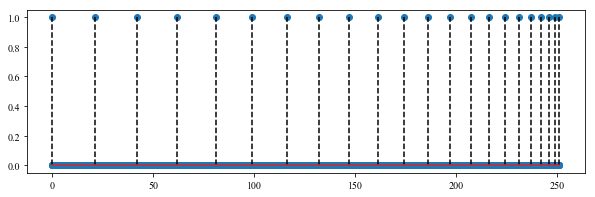

In [105]:
t = np.array([[0,0,0,0,1]])
z = np.array([[0,0,0,0,0]])
z = np.repeat(z, 20, axis=0 )
print z
t0 = np.vstack((t,z))
t0 = np.vstack((t0,t0))

st = 19
for i in range(20):
    z = np.array([[0,0,0,0,0]])
    z = np.repeat(z, st, axis=0)
    t1 = np.vstack((t,z))
    t0 = np.vstack((t0,t1))
    st = st - 1

plt.figure(figsize=(10,3))
for i in range(t0.shape[1]):
    plt.stem(t0[:,i], '--k', linewidth=0.2)


plt.savefig('temporal-compressions.pdf', dpi=300)


plt.show()




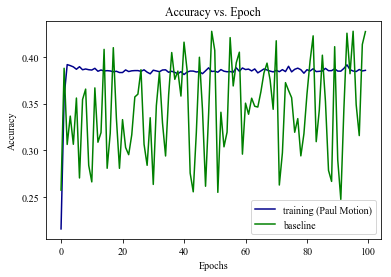

In [77]:
plt.figure()
tacc, = plt.plot(history.history["acc"], 'darkblue', label='training (Paul Motion)')
vacc, = plt.plot(history.history["val_acc"], 'green', label='baseline')
plt.title('Accuracy vs. Epoch')
plt.legend(handles=[tacc,vacc])
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.savefig('plots/the-accuracy-8am.pdf', dpi=100)
plt.show()

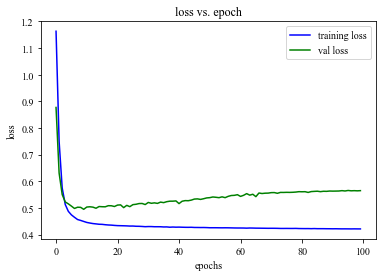

In [67]:

plt.figure()
tloss, = plt.plot(history.history["loss"], 'b', label='training loss')
vloss, = plt.plot(history.history["val_loss"], 'g', label='val loss')
plt.title('loss vs. epoch')
plt.ylabel('loss')
plt.xlabel('epochs')
import matplotlib.patches as mpatches

plt.legend(handles=[tloss,vloss])
plt.savefig('plots/the-loss-8am.pdf', dpi=100)
plt.show()

In [100]:
loss = []
batch_size = 72
num_iters = 1

for i in range(num_iters):
    print '... running batch %r/%r...' %(i,num_seq)
    history = model.fit(xtr, ytr, nb_epoch=10, batch_size=batch_size,
             verbose=2, shuffle=True, callbacks=callbacks_list)
    loss.append(history.history['loss'])
    model.reset_states()

loss = np.array(loss)
model.save_weights(nn_params["loss directory"] + "weights-improvement-{epoch:02d}-{loss:.2f}.h5")

ts = time.gmtime()
modelsavefn = time.strftime("%c", ts).replace(' ', '_') + "-{epoch:02d}-{loss:.2f}" + ".h5"
print modelsavefn
model.save(nn_params["models dir"] + modelsavefn)



... running batch 0/1...
Epoch 1/10
 - 0s - loss: 15.5777

Epoch 00001: loss did not improve from 0.38350
Epoch 2/10
 - 0s - loss: 11.1426

Epoch 00002: loss did not improve from 0.38350
Epoch 3/10
 - 0s - loss: 9.3737

Epoch 00003: loss did not improve from 0.38350
Epoch 4/10
 - 0s - loss: 7.8785

Epoch 00004: loss did not improve from 0.38350
Epoch 5/10
 - 0s - loss: 6.6641

Epoch 00005: loss did not improve from 0.38350
Epoch 6/10
 - 0s - loss: 6.1492

Epoch 00006: loss did not improve from 0.38350
Epoch 7/10
 - 0s - loss: 5.9865

Epoch 00007: loss did not improve from 0.38350
Epoch 8/10
 - 0s - loss: 5.9252

Epoch 00008: loss did not improve from 0.38350
Epoch 9/10
 - 0s - loss: 5.8891

Epoch 00009: loss did not improve from 0.38350
Epoch 10/10
 - 0s - loss: 5.8691

Epoch 00010: loss did not improve from 0.38350
Wed_Jun__6_20:17:30_2018-{epoch:02d}-{loss:.2f}.h5


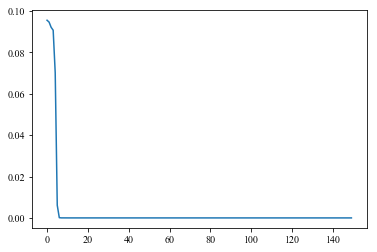

In [22]:
plt.figure()
plt.plot(loss)
plt.show()

In [123]:
seed = xtr[0:8,:,:]
theseed=model.predict(seed)
print theseed.shape


(8, 8, 10)


In [134]:
def predictSequences(theseed, num_sequences=3):
    #seed = np.reshape(theseed[0,:,:], (1, theseed[0,:,:].shape[0], theseed[0,:,:].shape[1]))
    seed = theseed
    sumseqs = np.empty((0,8,10))
    for i in range(num_sequences):
        theseq = model.predict(seed)
        print theseq.shape
        sumseqs = np.vstack((sumseqs, theseq))
        seed = theseq



    return theseq
        

In [135]:
#seed = np.reshape(xtr[0,:,:], (1, xtr[0,:,:].shape[0], xtr[0,:,:].shape[1]))
#print seed.shape
s = predictSequences(seed, 3)

(8, 8, 10)
(8, 8, 10)
(8, 8, 10)


In [133]:
s.shape

(8, 8, 10)

In [114]:
sumseqs = np.empty((0,8,10))

theseq = model.predict(xtr[0,:,:])


sumseqs = np.empty((0,8,10))
theseq = model.predict(xtr[0,:,:])
model.predict(theseq)
sumseqs = np.vstack((sumseqs, theseq))
theseq2 = model.predict(theseq)
sumseqs = np.vstack((sumseqs, theseq2))


ValueError: Error when checking : expected lstm_13_input to have 3 dimensions, but got array with shape (8, 10)

In [138]:
print sumseqs[0,:,:]
print sumseqs[8,:,:]


IndexError: index 0 is out of bounds for axis 0 with size 0

In [112]:
sumseqs.shape

(16, 8, 10)

In [110]:
ss[0:16,:]

array([[0.  , 0.67, 0.  , 0.  , 0.22, 0.01, 0.05, 0.01, 0.04, 0.01],
       [0.  , 0.07, 0.  , 0.  , 0.03, 0.  , 0.69, 0.01, 0.19, 0.  ],
       [0.  , 0.16, 0.  , 0.  , 0.15, 0.01, 0.55, 0.01, 0.11, 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.  ],
       [0.  , 0.67, 0.  , 0.  , 0.22, 0.01, 0.05, 0.01, 0.04, 0.01],
       [0.  , 0.07, 0.  , 0.  , 0.03, 0.  , 0.69, 0.01, 0.19, 0.  ],
       [0.  , 0.16, 0.  , 0.  , 0.15, 0.01, 0.55, 0.01, 0.11, 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.  ],
       [0.  , 0.07, 0.  , 0.  , 0.03, 0.  , 0.69, 0.01, 0.19, 0.  ],
       [0.  , 0.16, 0.  , 0.  , 0.15, 0.01, 0.55, 0.01, 0.11, 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.  ],
       [0.  , 0.67, 0.  , 0.  , 0.22, 0.01, 0.05, 0.01, 0.04, 0.01],
       [0.  , 0.07, 0.  , 0.  , 0.03, 0.  , 0.69, 0.01, 0.19, 0.  ],
       [0.  , 0.16, 0.  , 0.  , 0.15, 0.01, 0.55, 0.01, 0.11, 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.

In [109]:
ss = np.reshape(sumseqs, (16*8,10))

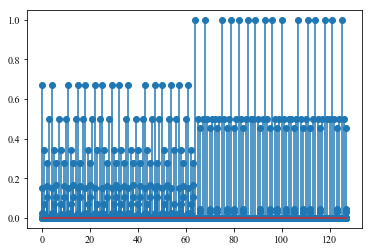

In [111]:

sc = np.array([1.1,1.0,0.9,0.8,0.7,0.6,0.5,0.4,0.3,0.2])

plt.figure()
for i in range(8):
    plt.stem(ss[:,i]*sc[i])      



plt.show()
plt.close()

(8, 8, 10)
[0.53 0.01 0.27 0.   0.67 0.07 0.17 0.  ]


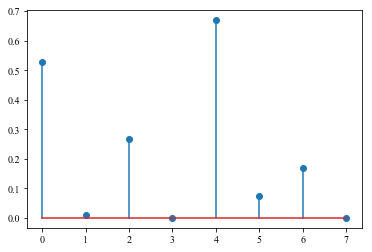

In [58]:
print theseq.shape
print theseq[0,:,1]
plt.figure()
plt.stem(theseq[0,:,1])
plt.show()

In [6]:

filen = "weights-improvement-01-2.98.hdf5"
model.load_weights(nn_params["weightsdir"] + filen)



In [176]:
xtr.shape
seed = xtr[10,:,:]
print seed
seed = np.reshape(seed, (1, seed.shape[0], seed.shape[1]))
print seed.shape

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]
(1, 6, 10)


In [21]:
def predict_point(model, data):
    #predict each timestep given the last sequence of the true data
    predicted = model.predict(data) 
    predicted = np.reshape(predicted, (predicted.size,)) 
    return predicted 

In [24]:
def generate_sequence(model, seed, seq_len, noiters, binflag=False):
    # shift window by 1 new prediction each time, re-run prediction on window 
    curr_frame = seed # this will be X_test data
    predicted = []
    thresh = 0.5
    gen_seq = np.empty((0, seed.shape[2]))
    for i in xrange(noiters):
        predpt = model.predict(curr_frame)#[0,0]
        print predpt
        #predpt[predpt > 0.5] = 1
        gen_seq = np.vstack((gen_seq, predpt))
        curr_frame = curr_frame[:, 1:, :]
        #print curr_frame.shape
        
        #print curr_frame[newaxis,:,:][0,0]
        curr_frame = np.insert(curr_frame, seq_len-1, predpt, axis=1)
    return gen_seq

In [42]:
xtr.shape
seed = xtr[1000,:,:]
seed = np.reshape(seed, (1, seed.shape[0], seed.shape[1]))


In [43]:
seq = generate_sequence(model, seed, 99, 30)

[[0.   0.42 0.   0.08 0.01 0.01 0.44 0.   0.04 0.  ]]
[[0.   0.41 0.   0.01 0.   0.   0.58 0.   0.   0.  ]]
[[0.   0.17 0.   0.   0.   0.   0.83 0.   0.   0.  ]]
[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]
[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]
[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]
[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]
[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]
[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]
[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]
[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]
[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]
[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]
[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]
[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]
[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]
[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]
[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]
[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]
[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]
[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]
[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]
[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]
[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]
[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]
[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]
[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]
[[0. 0. 0. 0. 0. 0. 1.

In [178]:
seq

array([[ 0.  ,  0.  , -0.  ,  0.  ,  0.  , -0.  ,  1.  ,  0.  , -0.  ,
         0.  ],
       [-0.  , -0.  , -0.  ,  0.  ,  0.  , -0.  ,  1.  , -0.  , -0.  ,
         0.  ],
       [-0.  , -0.  , -0.  , -0.  ,  0.  , -0.  ,  1.  , -0.  , -0.  ,
         0.  ],
       [-0.  , -0.  , -0.  , -0.  ,  0.  , -0.  ,  1.  , -0.  , -0.  ,
         0.  ],
       [-0.  , -0.01, -0.  , -0.  ,  0.  , -0.  ,  1.  , -0.  , -0.  ,
         0.  ],
       [-0.  , -0.01, -0.  , -0.  ,  0.  , -0.  ,  1.  , -0.  , -0.  ,
         0.  ],
       [-0.  , -0.01, -0.  , -0.  ,  0.  , -0.  ,  1.  , -0.  , -0.  ,
         0.  ],
       [-0.  , -0.01, -0.  , -0.  ,  0.  , -0.  ,  1.  , -0.  , -0.  ,
         0.  ],
       [-0.  , -0.01, -0.  , -0.  ,  0.  , -0.  ,  1.  , -0.  , -0.01,
         0.  ],
       [-0.  , -0.01, -0.  , -0.  ,  0.  , -0.  ,  1.  , -0.  , -0.01,
         0.  ],
       [-0.  , -0.01, -0.  , -0.  ,  0.  , -0.  ,  1.  , -0.  , -0.01,
         0.  ],
       [-0.  , -0.01, -0.  , -0.  ,  0.  , 

In [82]:
# predvect = predict_sequence(model, seed, 1, 20)
# print predvect

In [7]:
def load_npdata(datadirX, datadirY, split, repeat=False, no_times=400):
    x = np.load(datadirX)
    y = np.load(dataDirY)
    split = split 

    xtr = x[:split*x.shape[0],:,:]
    ytr = y[:split*y.shape[0]]

    xval = x[split*x.shape[0]:,:,:]
    yval = y[split*x.shape[0]]
    
    if repeat==True:
        xtr = np.repeat(s, no_times, axis=0)
        ytr = np.repeat(sy,no_times, axis=0)
    
    return xtr, ytr, xval, yval
    